## Importacion de librerias y carga de data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Cargamos los datos
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

# Copias de los datos originales
train_original = train.copy()
test_original = test.copy()

## Proceso EDA


In [ ]:
train.head()

In [ ]:
# mostrar la cantidad de prestamos en estado aprobados (Y) y no aprobados (N)
# separados por categoria (loan_status), en un grafico de barras
train['Loan_Status'].value_counts(normalize=True).plot.bar(
    figsize=(5, 3), title='Loan_Status')

In [ ]:
plt.figure(1)

plt.subplot(221)
df = train.dropna()
# para ver la distribucion de los datos del monto del prestamo
sns.distplot(df['LoanAmount'])
# En este primer grafico se puede observar que la distribucion de los datos del monto del prestamo es anormal
# ya que tenemos lo que se llama right skewness, es decir, la cola de la distribucion se extiende hacia la derecha
# lo que denota que hay valores atipicos (outliers) en los datos

# para ver la distribucion de los datos del monto del prestamo por genero
train.boxplot(column='LoanAmount', by='Gender')

### - Relacionando variables independientes con variable dependiente


In [ ]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
print(Gender)  # para ver la cantidad de prestamos aprobados y no aprobados por genero
# para ver la relacion entre el porcentaje de prestamos aprobados y no aprobados por genero
Gender.div(Gender.sum(1).astype(float), axis=0).plot(
    kind="bar", stacked=True, figsize=(4, 4))

In [ ]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
# para ver la cantidad de prestamos aprobados y no aprobados por estado civil
print(Married)
# para ver la relacion entre el porcentaje de prestamos aprobados y no aprobados por estado civil
Married.div(Married.sum(1).astype(float), axis=0).plot(
    kind="bar", stacked=True, figsize=(4, 4))

In [ ]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
# para ver la cantidad de prestamos aprobados y no aprobados por dependientes
print(Dependents)
# para ver la relacion entre el porcentaje de prestamos aprobados y no aprobados por dependientes
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(
    kind="bar", stacked=True, figsize=(4, 4))

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
# para ver la cantidad de prestamos aprobados y no aprobados por ingreso total
print(Total_Income_bin)
# para ver la relacion entre el porcentaje de prestamos aprobados y no aprobados por ingreso total
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(
    kind="bar", stacked=True, figsize=(4, 4))

## Transformando las variables cualitativas a cuantitavas


In [ ]:
# train = train.drop(['Total_Income_bin', 'Total_Income', 'Income_bin'], axis=1)
# train = train.drop(['Loan_ID', 'Married', 'Self_Employed', 'Education', 'Property_Area'], axis=1)
# usar esta instruccion para eliminar las columnas que no se van a usar

In [3]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Gender'].replace('Male', 0, inplace=True)
train['Gender'].replace('Female', 1, inplace=True)
test['Gender'].replace('Male', 0, inplace=True)
test['Gender'].replace('Female', 1, inplace=True)

## Matriz de Correlación entre variables numéricas


In [ ]:
# OJO LIMPIA LA DATA ANTES DE USAR ESTA INSTRUCCION
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, annot=True, vmax=.8, square=True, cmap="BuPu")

## Valores perdidos y tratamiento de variables con valores atípicos


#### - Llenando valores perdidos


In [ ]:
train.isnull().sum()  # para ver la cantidad de datos nulos en cada columna

In [4]:
# Aqui se reemplazan los datos nulos por la moda de cada columna
# es una practica comun para los datos categoricos (no numericos)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [5]:
# Aqui se hace lo mismo pero para los datos de prueba
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [6]:
# para ver la cantidad de datos en cada valor de la columna
train['Loan_Amount_Term'].value_counts()

# Aqui vamos a reemplazar los datos nulos por la moda de la columna
train['Loan_Amount_Term'].fillna(
    train['Loan_Amount_Term'].mode()[0], inplace=True)

In [7]:
# Llenando nulos tambien pero para los datos de prueba (test)
test['Loan_Amount_Term'].value_counts()
test['Loan_Amount_Term'].fillna(
    test['Loan_Amount_Term'].mode()[0], inplace=True)

In [8]:
# llenamos los datos nulos con la media de la columna porque son datos
# no categoricos (numericos)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [9]:
# llenamos los datos nulos con de LoanAmount en los datos de prueba (test)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

#### - Tratamiento de valores atípicos


<Axes: >

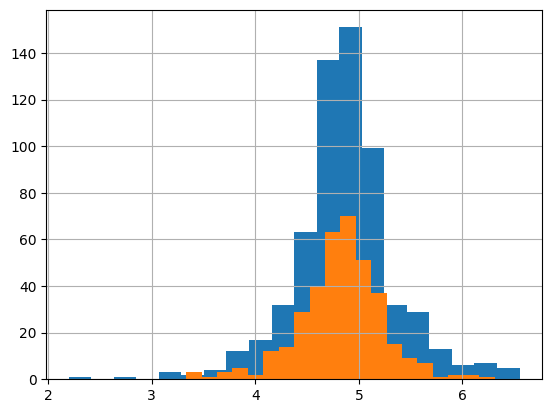

In [10]:
# al tener que la variable LoanAmount tiene valores muy dispersos,
# se usa la funcion logaritmica para que los datos se distribuyan de
# una manera mas uniforme y se puedan usar para el modelo (haremos este
# cambio en los datos de entrenamiento y en los de prueba)
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

# Construcción del modelo de regresión logística


In [ ]:
# Justificacion https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119689-model-building-part-i

In [11]:
# se elimina la columna Loan_ID porque no se va a usar
train = train.drop('Loan_ID', axis=1)
# se elimina la columna Loan_ID porque no se va a usar
test = test.drop('Loan_ID', axis=1)

In [12]:
# se elimina la columna Loan_Status porque es la que se va a predecir
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status  # se guarda la columna Loan_Status en una variable

In [15]:
X = pd.get_dummies(X)  # se convierten los datos categoricos en numericos
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [ ]:
# para usar la regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # para ver la precision del modelo

model = LogisticRegression()  # se crea el modelo
# se entrena el modelo con los datos de entrenamiento
model.fit(x_train, y_train)

# aqui vamos a predecir los datos de validacion
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr',
                   n_jobs=1, penalty='l2', random_state=1, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# se hacen las predicciones con los datos de prueba
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)  # se calcula la exactitud del modelo

# Predicción de aprobación de préstamos con datos propios


In [ ]:
# se hacen las predicciones con los datos de prueba
pred_test = model.predict(test)
pred_test  # se muestran las predicciones

In [ ]:
# se lee el archivo de muestra
submission = pd.read_csv("sample_submission_49d68Cx.csv")
# se reemplaza la columna Loan_Status con las predicciones
submission['Loan_Status'] = pred_test
# se reemplaza la columna Loan_ID con los datos de prueba
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(
    0, 'Prestamo denegado', inplace=True)  # se reemplazan los 0 por N
submission['Loan_Status'].replace(
    1, 'Prestamo aprobado', inplace=True)  # se reemplazan los 1 por Y

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv(
    'LogisticRegression.csv')  # se crea el archivo de salida

# Construccion del modelo con Decision Tree


In [ ]:
# para hacer la validacion cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn import tree  # para usar el arbol de decisiones

i = 1
# se crea el objeto para hacer la validacion cruzada
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    # se dividen los datos de entrenamiento
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]  # se dividen los datos de prueba
    model = tree.DecisionTreeClassifier(random_state=1)  # se crea el modelo
    model.fit(xtr, ytr)  # se entrena el modelo
    pred_test = model.predict(xvl)  # se hacen las predicciones
    score = accuracy_score(yvl, pred_test)  # se calcula la exactitud
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(test)  # se hacen las predicciones

In [ ]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")
# se reemplaza la columna Loan_Status con las predicciones
submission['Loan_Status'] = pred_test
# se reemplaza la columna Loan_ID con los datos de prueba
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(
    0, 'Prestamo denegado', inplace=True)  # se reemplazan los 0 por N
submission['Loan_Status'].replace(
    1, 'Prestamo aprobado', inplace=True)  # se reemplazan los 1 por Y

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv(
    'Decision Tree.csv')  # se crea el archivo de salida

# Construcción del modelo con Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(test)

In [ ]:
# para hacer la busqueda de parametros
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}

# se crea el objeto para hacer la busqueda de parametros
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

# se dividen los datos de entrenamiento y prueba
x_train, x_cv, y_train, y_cv = train_test_split(
    X, y, test_size=0.3, random_state=1)

# se entrena el modelo
grid_search.fit(x_train, y_train)

In [ ]:
# la funcion de GridSearchCV devuelve el mejor estimador y los mejores parametros para el modelo
GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                                                            max_depth=None, max_features='auto', max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_samples_leaf=1, min_samples_split=2,
                                                                            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                                                                            oob_score=False, random_state=1, verbose=0, warm_start=False), n_jobs=1, param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [
                                                                                1, 21, 41, 61, 81, 101, 121, 141, 161, 181]}, pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)

In [ ]:
grid_search.best_estimator_  # se muestran los mejores parametros

In [ ]:
# ahora vamos a usar esos parametros para crear el modelo
# y hacer las predicciones con los datos de prueba
RandomForestClassifier(
    bootstrap=True, class_weight=None, criterion='gini',
    max_depth=3, max_features='auto', max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
    oob_score=False, random_state=1, verbose=0, warm_start=False
)

In [ ]:
# Ahora vamos a usar esos parametros para crear el modelo y hacer las predicciones con los datos de prueba
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:, 1]


In [ ]:
# se crea el archivo de salida
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# se reemplazan los 0 por denegados y los 1 por aprobados
submission['Loan_Status'].replace(0, 'Prestamo denegado', inplace=True)
submission['Loan_Status'].replace(1, 'Prestamo aprobado', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv(
    'Random Forest.csv')  # se crea el archivo de salida

In [ ]:
# se crea un dataframe con las caracteristicas mas importantes
importances = pd.Series(model.feature_importances_, index=X.columns)

# se ordenan las caracteristicas de mayor a menor
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')

# Construccion del modelo con XGBoost

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score  # para ver la precision del modelo


# se crea el modelo
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(test)
    pred3 = model.predict_proba(test)[:, 1]
# Aqui se muestran los 5 mejores modelos de acuerdo a su precision


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7704918032786885


In [19]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Aqui vamos a generar un archivo de salida para este modelo
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# se reemplazan los 0 por denegados y los 1 por aprobados
submission['Loan_Status'].replace(0, 'Prestamo denegado', inplace=True)
submission['Loan_Status'].replace(1, 'Prestamo aprobado', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv(
    'XGBoost.csv')  # se crea el archivo de salida